<a href="https://colab.research.google.com/github/Sanja2000/Placement-Assignment/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD DEFAULT PREDICTION**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/UCI_Credit_Card.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Importing train test split, RandomForest, accuracy_score, confusion_matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Viewing the original shape of the data

In [ ]:
print("original shape of the data: "+ str(data.shape))
feature_names = data.columns

original shape of the data: (30000, 25)


Dropping the default.payment.next.month column which is of no use

In [ ]:
x = data.drop('default.payment.next.month', axis =1).values
y = data['default.payment.next.month'].values
print(x.shape)
print(y.shape)

(30000, 24)
(30000,)


Importing the standardscaler and scaling the data into train and test

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Viewing the shape of the train and test data

In [ ]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (21000, 24)
Training Labels Shape: (21000,)
Testing Features Shape: (9000, 24)
Testing Labels Shape: (9000,)


Fitting the RandomForestClassifier to the Train data

In [ ]:
rf = RandomForestClassifier(n_estimators=2000, random_state = 500)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=500)

Viewing the feature Importance

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.09235568111085556, 'PAY_0'),
 (0.07020231378547438, 'ID'),
 (0.05663202624801115, 'AGE'),
 (0.05499775987608825, 'BILL_AMT1'),
 (0.05116578508129579, 'LIMIT_BAL'),
 (0.05002639965202051, 'BILL_AMT2'),
 (0.048287928129169835, 'PAY_AMT1'),
 (0.04792186732654943, 'BILL_AMT3'),
 (0.046701932027539625, 'BILL_AMT4'),
 (0.04642381862905124, 'BILL_AMT5'),
 (0.0464166936619031, 'BILL_AMT6'),
 (0.04410811516878659, 'PAY_AMT2'),
 (0.04306981564262283, 'PAY_AMT6'),
 (0.042585092768106216, 'PAY_AMT3'),
 (0.0422573305588674, 'PAY_2'),
 (0.04071977024714528, 'PAY_AMT5'),
 (0.03996326694131727, 'PAY_AMT4'),
 (0.02957618966335775, 'PAY_3'),
 (0.022981876242405462, 'PAY_5'),
 (0.022277678304879266, 'PAY_4'),
 (0.019618553617038913, 'PAY_6'),
 (0.018246722205473652, 'EDUCATION'),
 (0.012634818970507972, 'MARRIAGE'),
 (0.010828564141532512, 'SEX')]

pay_0 has the value of 0.92 so it is the most important feature

Visualizing the feature importance in plot

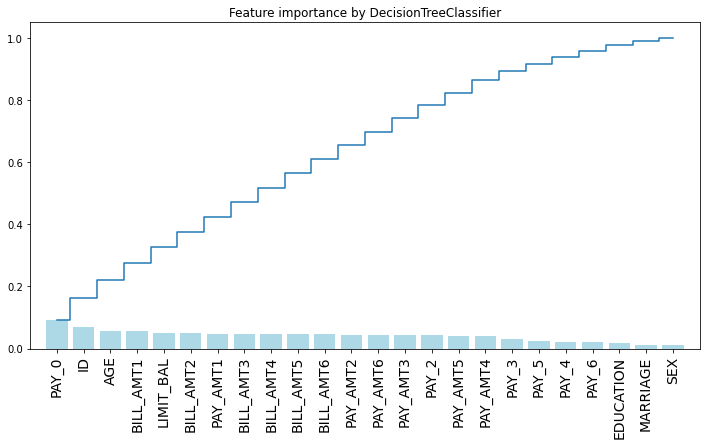

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importance by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='cumulative')
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


Evaluation Metrics

Finding the roc_auc_score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_y_prediction = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
print(rf_roc_auc)

0.6562644198475511


Importing the precision_score and finding it for the data

In [ ]:
from sklearn.metrics import precision_score
print("precision: {0}".format(precision_score(y_test, rf_y_prediction)))

precision: 0.6510989010989011


Finding the precision,Recall,F1 score 

In [ ]:
print(classification_report(y_test, rf_y_prediction, target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.84      0.95      0.89      7060
     default       0.65      0.37      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Finding the Confusion_matrix

In [ ]:
confusion_matrix(y_test,rf_y_prediction)

array([[6679,  381],
       [1229,  711]])

Importing the LogisticRegression and fit to the train data.

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

Finding the predicted probability of the x_test

In [ ]:
log.predict_proba(x_test)

array([[0.47560865, 0.52439135],
       [0.74545815, 0.25454185],
       [0.68295741, 0.31704259],
       ...,
       [0.75224489, 0.24775511],
       [0.92490443, 0.07509557],
       [0.90690694, 0.09309306]])

Finding the predictions of x_test

In [ ]:
y_test_predictions = log.predict(x_test)

Evaluation Metrics

Finding the Accuracy

In [ ]:
accuracy_test_set = log.score(x_test, y_test)
accuracy_test_set

0.816

Finding the Confusion_Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, log.predict(x_test))
cnf_matrix

array([[6901,  159],
       [1497,  443]])

Finding the Precision_score

In [ ]:
from sklearn.metrics import precision_score
print("precision: {0}".format(precision_score(y_test, y_test_predictions)))

precision: 0.7358803986710963


Finding the Recall score

In [ ]:
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, y_test_predictions), 2))

Recall: 0.23


Finding the F1 score

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
f1_score(y_test, y_test_predictions)

0.3485444531864673

Plotting the Auroc

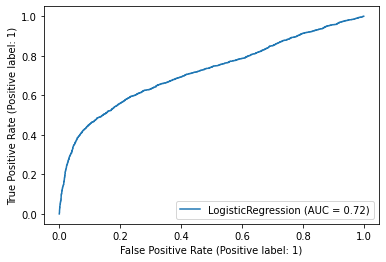

In [ ]:
plot_roc_curve(log, x_test, y_test)

Finding the AUROC score

In [ ]:
roc = roc_auc_score(y_test, log.predict_proba(x_test)[:,-1])
roc

0.7186345317017611

Plotting the roc_curve of the RandomForest and LogisticRegression model

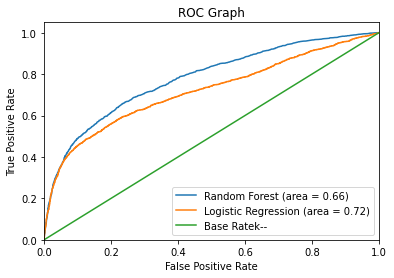

In [ ]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,-1])
lg_fpr, lg_tpr, log_reg_thresholds = roc_curve(y_test, log.predict_proba(x_test)[:,-1])
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(lg_fpr, lg_tpr, label='Logistic Regression (area = %0.2f)' % roc)
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()



The value of RandomForest is: 0.66 
The value of LogisticRegression is: 0.72
The AUROC value of LogisticRegression is higher than the RandomForest.
So the LogisticRegression is the best model.